In [200]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

In [201]:
os.chdir('/Users/gyr/Desktop/5019_Python/lab1') # change working directory
d = pd.read_csv("GSS.2006.csv")
d.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Recode 2 different variables into new categories. They can both be continuous-ish or both be nominal-ish, or one of each. Tell me what you did and explain the variable(s).

## a) The first variable I chose was socfrend, which represents frequency of having a social evening with friends who live outside the neighborhood. Socfrend 1 to 7 indiccates different social frequenccy. Social frequency decreases as numbers increase.

## Create a number of categories for this variable: high, medium, low. 

In [202]:
pd.crosstab(index=d["socfrend"], columns="count")

col_0,count
socfrend,
1.0,64
2.0,390
3.0,370
4.0,462
5.0,343
6.0,155
7.0,205


## I use label 2 for high social frequency, label 1 for medium social frequency, and label 0 for low social frequency which also includes no social

In [234]:
## 3 types of high frequency, medium frequency, low frequency ##


conditions = [
    (d['socfrend'] <= 2) ,
    (d['socfrend'] >= 3 ) & (d['socfrend'] <= 4),
    (d['socfrend'] >= 5)]
choices = [2, 1, 0]
d['socfrend_cut'] = np.select(conditions, choices)

In [235]:
d.socfrend_cut.describe()

count    4510.000000
mean        0.385809
std         0.662109
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: socfrend_cut, dtype: float64

In [236]:
## How many of each category are there?
d['socfrend_cut'] = np.select(conditions, choices, default=np.nan)
pd.value_counts(d["socfrend_cut"], sort=False)

0.0    703
1.0    832
2.0    454
Name: socfrend_cut, dtype: int64

### Check the recoding: It is "2" for categories less than 3, "1" for categories from 3 to 4, and it is "0" for categories greater than 4.

In [224]:
res = pd.crosstab(d.socfrend, d.socfrend_cut)
res.astype('float').div(res.sum(axis=0), axis=1)

socfrend_cut,0.0,1.0,2.0
socfrend,,,
1.0,0.000000,0.140969,0.000000
2.0,0.000000,0.859031,0.000000
3.0,0.000000,0.000000,0.444712
4.0,0.000000,0.000000,0.555288
5.0,0.487909,0.000000,0.000000
6.0,0.220484,0.000000,0.000000
7.0,0.291607,0.000000,0.000000


## b) Creating a binary category for variable wrkstat, which indicates respondents' work status last week. The wrkstat 1 to 8 represent the different working states. working full-time, part-time, going to school, keeping house, or what.


In [239]:
pd.crosstab(index=d["wrkstat"], columns="count")

col_0,count
wrkstat,
1.0,2322
2.0,440
3.0,90
4.0,148
5.0,715
6.0,140
7.0,496
8.0,155


## Current working status can be full-time, part-time or temporarily off of people are coded for 1(employed). The people with no job status are coded for 0(unemployed)

In [240]:
conditions = [
    (d['wrkstat'] < 4),
    (d['wrkstat'] > 3 )]
choices = [1,0]
d['emp'] = np.select(conditions, choices, default=np.nan)

In [241]:
## How many of each category are there?
d['emp'] = np.select(conditions, choices, default=np.nan)
pd.value_counts(d["emp"], sort=False)

1.0    2852
0.0    1654
Name: emp, dtype: int64

### Check the recoding: It is "1" for categories less than 4, and it is "0" for categories greater than 3.

In [242]:
res = pd.crosstab(d.wrkstat, d.emp)
res.astype('float').div(res.sum(axis=0), axis=1)

emp,0.0,1.0
wrkstat,,
1.0,0.000000,0.814165
2.0,0.000000,0.154278
3.0,0.000000,0.031557
4.0,0.089480,0.000000
5.0,0.432285,0.000000
6.0,0.084643,0.000000
7.0,0.299879,0.000000
8.0,0.093712,0.000000


# 2. Use one (or both) of your recoded variables to do a cross-tabulation. Explain your results.

### I want to know how different work status affects the frequency of social interaction

In [244]:
res.p = pd.crosstab(d['socfrend_cut'], d['emp'], normalize='columns')
res.p

emp,0.0,1.0
socfrend_cut,,
0.0,0.413838,0.315617
1.0,0.382507,0.440720
2.0,0.203655,0.243663


## The result from this cross-tabulation shows that employees typically have a higher frequency of socializing with friends compared to the unemployed. 24.4% of employees have high frequency of socializing, 44.1% have medium frequency of socializing, and both medium and high frequency of socializing exceed the percentage of the unemployed, 20.4% and 38.3%. While the number of low social frequency unemployed is much higher than the number of employed, approximately 10%. Compared with the unemployed, Therefore, the employed have relatively higher social frequency.


# 3. Run a linear regression with 1 independent and 1 dependent variable; make all of the recodes necessary to make the model as easy to interpret as possible; and explain your results.

## The two variables I chose are prestg80 and sppres80. which represent the prestige of the respondent's occupation and the prestige of the respondent's spouse's occupation, respectively. My question is whether respondents' occupational prestige and their spouse's occupational prestige can show a positive relationship.

In [143]:
lm = smf.ols(formula = 'sppres80 ~ prestg80', data = d).fit()
print (lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:               sppres80   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     218.3
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           6.85e-47
Time:                        17:09:56   Log-Likelihood:                -7773.4
No. Observations:                1932   AIC:                         1.555e+04
Df Residuals:                    1930   BIC:                         1.556e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8109      1.055     29.194      0.0

## Conclusion: on average, for each one point increase in respondent’s occupational prestige, the prestige of respondent's spouse's occupation will raise 0.323 more prestige points. One possible hypothesis is that people are more likely to choose a spouse with a prestige similar to their profession.

# 4. Plot two variables, either as a scatter plot or boxplot; add in trend/regression lines; and explain your results.



<AxesSubplot:xlabel='prestg80', ylabel='sppres80'>

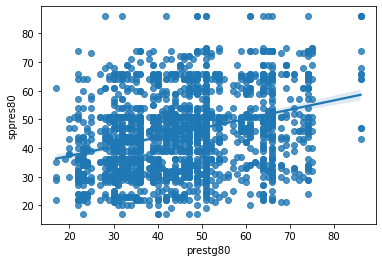

In [142]:
import seaborn as sns
sns.regplot(x = d['prestg80'], y = d['sppres80'])

## From the  regression plot above, it is obvious that there is a positive relationship between variable prestg80 and sppres80. As the prestige of the respondent's occupation increases, the occupational prestige of his or her spouse also increases. 